Variable=	Description

Loan_ID=	Unique Loan ID

Gender=	Male/ Female

Married	=Applicant married (Y/N)

Dependents=	Number of dependents

Education	=Applicant Education (Graduate/ Under Graduate)

Self_Employed=	Self employed (Y/N)

ApplicantIncome	=Applicant income

CoapplicantIncome=	Coapplicant income

LoanAmount=	Loan amount in thousands

Loan_Amount_Term=	Term of loan in months

Credit_History=	credit history meets guidelines

Property_Area=	Urban/ Semi Urban/ Rural

Loan_Status=	(Target) Loan approved (Y/N)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pc\Anaconda3\sruthi\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.LOADING THE DATASET

In [28]:
train=pd.read_csv('train.csv')
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
test=pd.read_csv('test.csv')
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [30]:
train.shape,test.shape

((614, 13), (367, 12))

## 2.DATA EXPLORATION

In [5]:
#Combining the train and test dataset.

train['source']='train'
test['source']='test'
data=pd.concat([train,test],sort=True)
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [6]:
data.shape

(981, 14)

## 3.DATA EXPLORATION

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    981 non-null    int64  
 1   CoapplicantIncome  981 non-null    float64
 2   Credit_History     902 non-null    float64
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Gender             957 non-null    object 
 6   LoanAmount         954 non-null    float64
 7   Loan_Amount_Term   961 non-null    float64
 8   Loan_ID            981 non-null    object 
 9   Loan_Status        614 non-null    object 
 10  Married            978 non-null    object 
 11  Property_Area      981 non-null    object 
 12  Self_Employed      926 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


numerical columns:
                    1.ApplicantIncome   
                    
                    2.CoapplicantIncome 
                    
                    3.Credit_History  
                    
                    4.LoanAmount 
                    
                    5.Loan_Amount_Term     
    
categorical columns:
                    1.Dependents 
                    
                    2.Education  
                    
                    3.Gender   
                    
                    4.Loan_ID
                    
                    5.Married  
                    
                    6.Property_Area  
                    
                    7.Self_Employed    
                    
target column:      Loan_Status          

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [ ]:
inference:
    1.since the minimum applicantincome is 0 ,some people with no income have also applied for loan.
     and people with maximum income of 81,000 have applied for the loan.
    2.similarly some people with coapplicant of noincome have also applied for the loan and coapplicant with maximum salary of 41000 have also applied for the loan.
    3.A minimum loan amount request of 9000 and maximum loan amount of 700,000 have been made.
    4.minimum loan amount term of 6months and maximum of 480  months.

In [10]:
a=data.drop(['Loan_ID','Loan_Status','source'],axis=1)
cat=a.select_dtypes(include='object')

for col in cat:
    print('frequencies of categories in',col,":","\n")
    print(data[col].value_counts(),"\n\n")

frequencies of categories in Dependents : 

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64 


frequencies of categories in Education : 

Graduate        763
Not Graduate    218
Name: Education, dtype: int64 


frequencies of categories in Gender : 

Male      775
Female    182
Name: Gender, dtype: int64 


frequencies of categories in Married : 

Yes    631
No     347
Name: Married, dtype: int64 


frequencies of categories in Property_Area : 

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64 


frequencies of categories in Self_Employed : 

No     807
Yes    119
Name: Self_Employed, dtype: int64 




## 3.DATA VISUALIZATION

#### a.target column

In [8]:
train['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

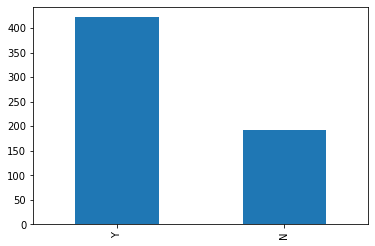

In [21]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

In [ ]:
#so,out of 614 people,only 69% people got their loan approved.

In [ ]:
#The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined

#### b.univariate analysis

#### b1.categorical columns

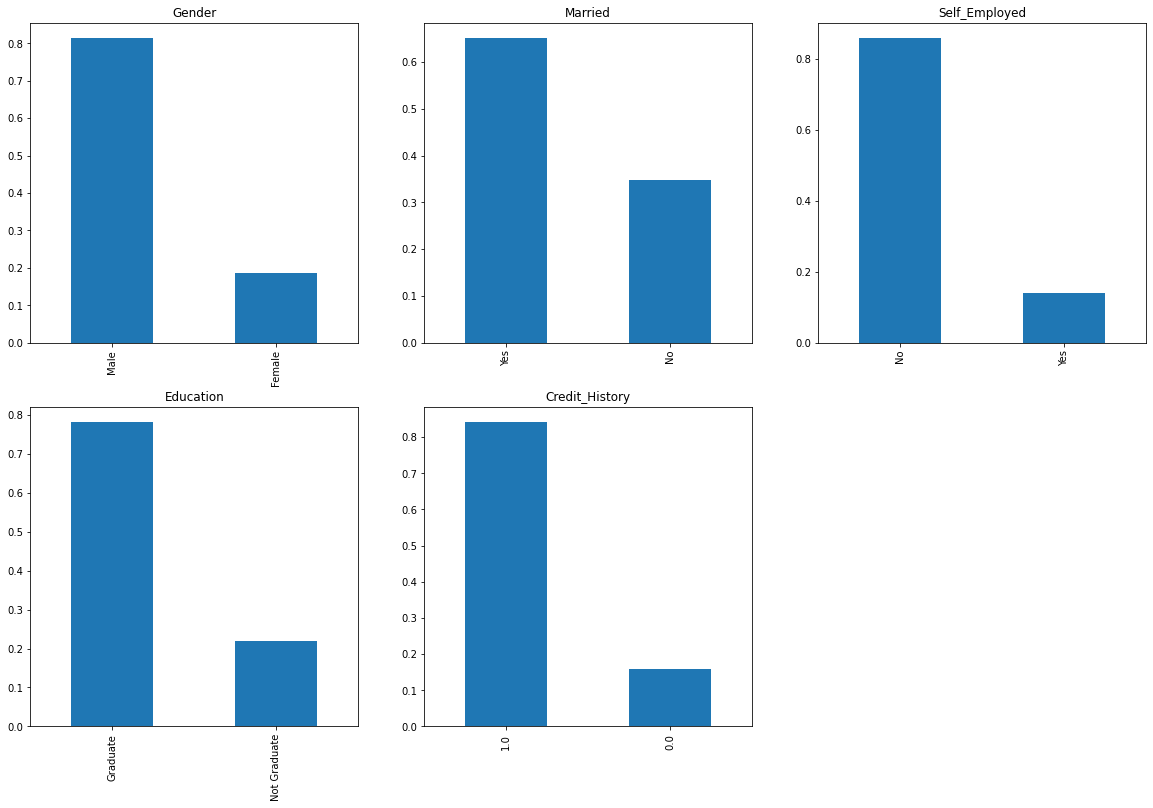

In [22]:
plt.figure(1)
plt.subplot(331)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20), title= 'Gender') 
plt.subplot(332) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(333) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(334) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(335) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

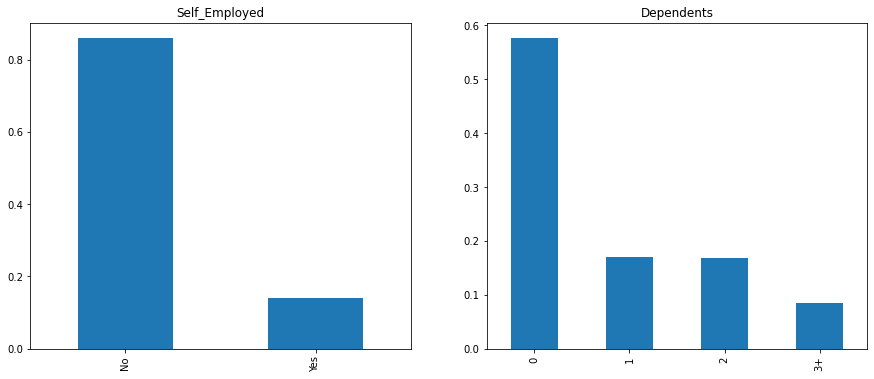

In [23]:
plt.figure(1)
plt.subplot(121)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(15,6), title= 'Self_Employed') 
plt.subplot(122) 
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents') 
plt.show()

### Conclusions: 
    
1.We can see that approximately 81% are Male and 19% are female.
2.Percentage of applicants with no dependents is higher.
3.There are more number of graduates than non graduates.
4.Semi Urban people is slightly higher than Urban people among the applicants.
5.Larger Percentage of people have a good credit history.
    

In [24]:
def plot(feature):
    sns.distplot(feature)
    plt.show()
    return

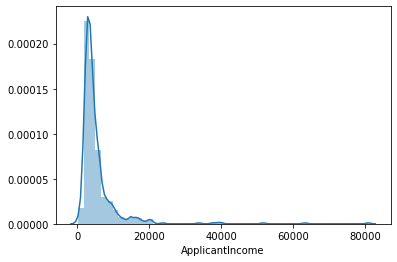

In [25]:
plot(train['ApplicantIncome'])

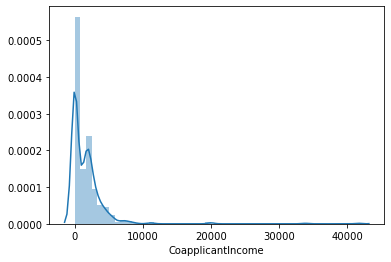

In [26]:
plot(train['CoapplicantIncome'])

C:\Users\pc\Anaconda3\sruthi\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pc\Anaconda3\sruthi\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\pc\Anaconda3\sruthi\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\pc\Anaconda3\sruthi\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


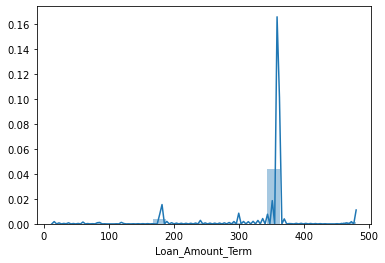

In [27]:
plot(train['Loan_Amount_Term'])

In [28]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'source'],
      dtype='object')

#### c.bivariate analysis

#### c1.bivariate analysis between target column and continuous variables

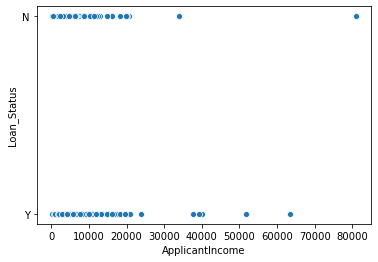

In [29]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=train)
plt.show()

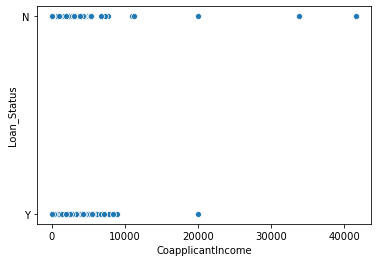

In [30]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=train)
plt.show()

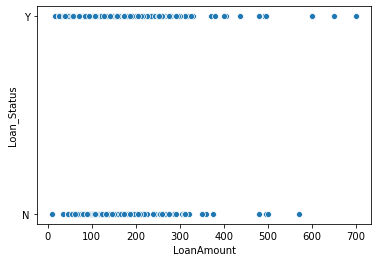

In [31]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=train)
plt.show()

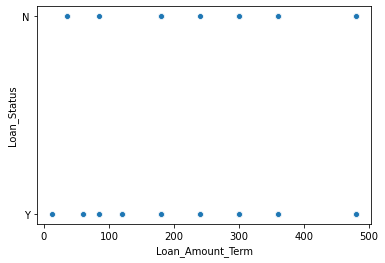

In [32]:
sns.scatterplot(x='Loan_Amount_Term',y='Loan_Status',data=train)
plt.show()

#### c2.bivariate analysis between target column and categorical variables

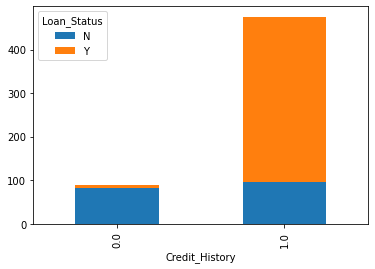

In [33]:
pd.crosstab(train['Credit_History'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

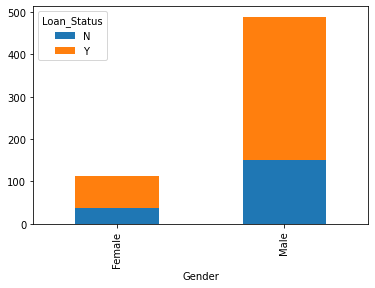

In [34]:
pd.crosstab(train['Gender'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

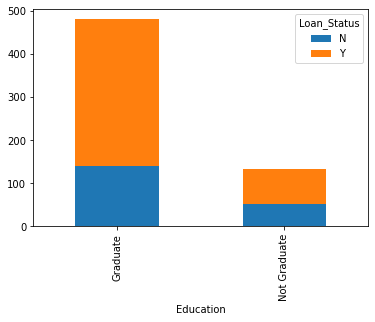

In [35]:
pd.crosstab(train['Education'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

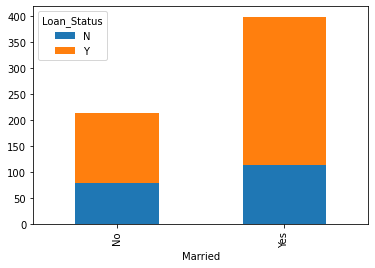

In [36]:
pd.crosstab(train['Married'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

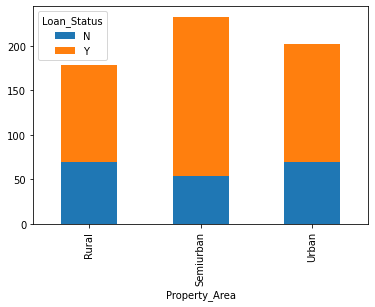

In [37]:
pd.crosstab(train['Property_Area'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

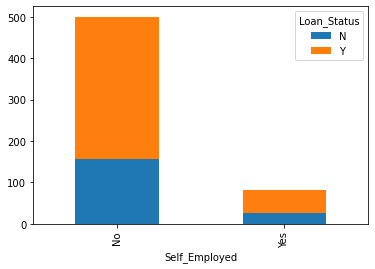

In [38]:
pd.crosstab(train['Self_Employed'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

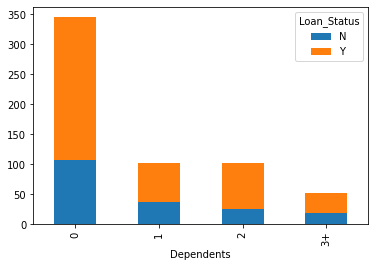

In [39]:
pd.crosstab(train['Dependents'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

## 4.DATA CLEANING

### Null Value treatment

In [31]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [32]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

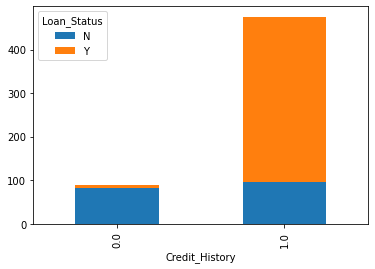

In [11]:
#credit history

pd.crosstab(train['Credit_History'],train['Loan_Status']).plot(kind='bar',stacked=True)
plt.show()

#loan has been approved for the people who have crdit history equal to 1.so imputing credit score =1,for all the loan status approved.

In [33]:
i=train[(train['Credit_History'].isnull()==True) & (train['Loan_Status']=='Y') ].index
for index in i:
    train['Credit_History'].loc[index]=1.0
train['Credit_History'].fillna(0,inplace=True)   

C:\Users\pc\Anaconda3\sruthi\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
train['Credit_History'].isnull().sum()

0

In [35]:
#importing random values of 0 and 1 for Self_Employed,Gender,Married

#coverting the columns to numeric
train['Self_Employed']=train['Self_Employed'].map({'Yes':1,'No':0})
train['Gender']=train['Gender'].map({'Male':0,'Female':1})
train['Married']=train['Married'].map({'Yes':1,'No':0})

In [36]:
import random

In [37]:
values=[0,1]
train['Gender'].fillna(random.choice(values),inplace=True)
train['Married'].fillna(random.choice(values),inplace=True)
train['Self_Employed'].fillna(random.choice(values),inplace=True)

In [38]:
#filling dependent column

train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [39]:
#replacing 3+ to 3
train['Dependents']=train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [40]:
values=[0,1,2,3]
train['Dependents'].fillna(random.choice(values),inplace=True)

In [41]:
train['Dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     66
Name: Dependents, dtype: int64

In [42]:
#imputing knn imputers,before that converting all columns to numeric

#removing id column
train=train.drop(['Loan_ID'],axis=1)

#converting columns to numeric
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})
train['Education']=train['Education'].map({'Graduate':1,'Not Graduate':0})

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['Property_Area']=le.fit_transform(train['Property_Area'])

In [44]:
from sklearn.impute import KNNImputer
knn_imp=KNNImputer(n_neighbors=5)

In [45]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [46]:
df=knn_imp.fit_transform(train)
df=pd.DataFrame(df,columns=train.columns)

In [47]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [48]:
df.isnull().sum().sum()
#null values are removed

0

In [49]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1.0,0.0,5849.0,0.0,147.8,360.0,1.0,2.0,1.0
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


In [50]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [51]:
from sklearn.preprocessing import StandardScaler
xs=StandardScaler().fit_transform(x)
xs

array([[-0.50559245, -1.37208932, -0.77149007, ...,  0.27890264,
         0.44633928,  1.22329839],
       [-0.50559245,  0.72881553,  0.17212528, ...,  0.27890264,
         0.44633928, -1.31851281],
       [-0.50559245,  0.72881553, -0.77149007, ...,  0.27890264,
         0.44633928,  1.22329839],
       ...,
       [-0.50559245,  0.72881553,  0.17212528, ...,  0.27890264,
         0.44633928,  1.22329839],
       [-0.50559245,  0.72881553,  1.11574062, ...,  0.27890264,
         0.44633928,  1.22329839],
       [ 1.97787765, -1.37208932, -0.77149007, ...,  0.27890264,
        -2.24044813, -0.04760721]])

In [52]:
X=pd.DataFrame(xs,columns=x.columns)
X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.505592,-1.372089,-0.771490,0.528362,-0.392601,0.072991,-0.554487,0.016677,0.278903,0.446339,1.223298
1,-0.505592,0.728816,0.172125,0.528362,-0.392601,-0.134412,-0.038732,-0.215185,0.278903,0.446339,-1.318513
2,-0.505592,0.728816,-0.771490,0.528362,2.547117,-0.393747,-0.554487,-0.941216,0.278903,0.446339,1.223298
3,-0.505592,0.728816,-0.771490,-1.892641,-0.392601,-0.462062,0.251980,-0.308866,0.278903,0.446339,1.223298
4,-0.505592,-1.372089,-0.771490,0.528362,-0.392601,0.097728,-0.554487,-0.062953,0.278903,0.446339,1.223298


In [53]:
df_new = pd.concat([X,y],axis=1)
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-0.505592,-1.372089,-0.771490,0.528362,-0.392601,0.072991,-0.554487,0.016677,0.278903,0.446339,1.223298,1.0
1,-0.505592,0.728816,0.172125,0.528362,-0.392601,-0.134412,-0.038732,-0.215185,0.278903,0.446339,-1.318513,0.0
2,-0.505592,0.728816,-0.771490,0.528362,2.547117,-0.393747,-0.554487,-0.941216,0.278903,0.446339,1.223298,1.0
3,-0.505592,0.728816,-0.771490,-1.892641,-0.392601,-0.462062,0.251980,-0.308866,0.278903,0.446339,1.223298,1.0
4,-0.505592,-1.372089,-0.771490,0.528362,-0.392601,0.097728,-0.554487,-0.062953,0.278903,0.446339,1.223298,1.0


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [56]:
def grid_search(model,X,y,grid):
    cv=KFold(shuffle=True,n_splits=10,random_state=0)
    GS=GridSearchCV(estimator=model[1], param_grid=grid,cv=cv,scoring='accuracy')
    grid_result =GS.fit(X,y)
    print('For',model[0])
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    params = grid_result.cv_results_['params']

In [65]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)

print('for logistic regression',accuracy_score(y_test,y_pred1))#0.82113821138211

for logistic regression 0.8211382113821138


#### KNeighborsClassifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

model2 = ('KNN',KNeighborsClassifier())
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid2 = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [68]:
grid_search(model2,X,y,grid2)

For KNN
Best: 0.830487 using {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [92]:
knn=KNeighborsClassifier(metric= 'euclidean', n_neighbors=11, weights= 'uniform')
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)

In [93]:
print(accuracy_score(y_test,y_pred1))

0.8211382113821138


#### RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

model3 = ('Random Forest Classifier',RandomForestClassifier())
criterion = ['gini','entropy']
max_depth = [None,3,5,7]
n_estimators = [100,200,300,400]
max_features = ['sqrt', 'log2','auto']
grid3 = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion)

In [70]:
grid_search(model3,X,y,grid3)

For Random Forest Classifier
Best: 0.832152 using {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 100}


In [90]:
rfc=RandomForestClassifier(criterion= 'gini',max_depth= 7, max_features= 'auto', n_estimators=100)
rfc.fit(X_train,y_train)
y_pred2=rfc.predict(X_test)

In [91]:
print(accuracy_score(y_test,y_pred2))

0.8211382113821138


#### DecisionTreeClassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

model4=('DecisionTreeClassifier',DecisionTreeClassifier())
criterion=["gini", "entropy"]
max_depth=[5,10,15]
min_samples_leaf=[3,5,7,10]
grid4 = dict(min_samples_leaf=min_samples_leaf,max_depth=max_depth,criterion=criterion)

In [72]:
grid_search(model4,X,y,grid4)

For DecisionTreeClassifier
Best: 0.802856 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}


In [88]:
dtc=DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 10)
dtc.fit(X_train,y_train)
y_pred3=dtc.predict(X_test)

In [89]:
print(accuracy_score(y_test,y_pred3))

0.7804878048780488


#### BaggingClassifier

In [75]:
from sklearn.ensemble import BaggingClassifier

model5=('BaggingClassifier',BaggingClassifier())
n_estimators = [10,20,30,40,50,70]
max_samples=[5,10,15,20,25]
grid5 = dict(n_estimators=n_estimators,max_samples=max_samples)

In [76]:
grid_search(model5,X,y,grid5)

For BaggingClassifier
Best: 0.832179 using {'max_samples': 25, 'n_estimators': 40}


In [97]:
bag=BaggingClassifier(max_samples= 25, n_estimators=40)
bag.fit(X_train,y_train)
y_pred4=bag.predict(X_test)

In [98]:
print(accuracy_score(y_test,y_pred4))

0.8211382113821138


#### AdaBoostClassifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier

model6=('AdaBoostClassifier',AdaBoostClassifier())
n_estimators=[50,100,150]
learning_rate=[0.01,0.1,1]
grid6 = dict(n_estimators=n_estimators,learning_rate=learning_rate)

In [78]:
grid_search(model6,X,y,grid6)

For AdaBoostClassifier
Best: 0.830539 using {'learning_rate': 0.01, 'n_estimators': 50}


In [103]:
ada=AdaBoostClassifier(learning_rate= 0.01, n_estimators=50)
ada.fit(X_train,y_train)
y_pred5=ada.predict(X_test)

In [104]:
print(accuracy_score(y_test,y_pred5))

0.8211382113821138


#### GradientBoostingClassifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

model7=('GradientBoostingClassifier',GradientBoostingClassifier())
n_estimators = [100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
grid7 = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

In [312]:
grid_search(model7,X,y,grid7)

For GradientBoostingClassifier
Best: 0.825621 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}


In [108]:
gbc=GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 100, subsample= 0.5)
gbc.fit(X_train,y_train)
y_pred6=gbc.predict(X_test)

In [109]:
print(accuracy_score(y_test,y_pred6))

0.8211382113821138


#### using knn for prediction

In [124]:
knn=KNeighborsClassifier(metric='euclidean',n_neighbors=11, weights='uniform')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [125]:
print(accuracy_score(y_test,y_pred))

0.8211382113821138


In [126]:
print(confusion_matrix(y_test,y_pred))

[[18 21]
 [ 1 83]]


In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.46      0.62        39
         1.0       0.80      0.99      0.88        84

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.82      0.80       123



In [128]:
print('train_score',knn.score(X_train,y_train))
print('test_score',knn.score(X_test,y_test))

train_score 0.8370672097759674
test_score 0.8211382113821138


Confusion matrix values
[[18 21]
 [ 1 83]]


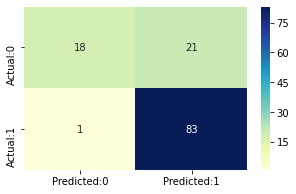

In [129]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix values")
print(cm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True,cmap="YlGnBu")
plt.show()

In [130]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
misclassification=1-accuracy
print("Accuracy :",accuracy)
print("Misclassification:",misclassification)
print("Sensitivity or True positive rate:",sensitivity)
print("Specificity or True negative rate:",specificity)

Accuracy : 0.8211382113821138
Misclassification: 0.17886178861788615
Sensitivity or True positive rate: 0.9880952380952381
Specificity or True negative rate: 0.46153846153846156


In [131]:
print("True positives:",TP)
print("True negatives:",TN)
print("Correct predictions:",TP+TN)
print("False positives:",FP," Type I error")
print("False negatives:",FN," Type II error")

True positives: 83
True negatives: 18
Correct predictions: 101
False positives: 21  Type I error
False negatives: 1  Type II error


In [132]:
y_pred_proba=knn.predict_proba(X_test)

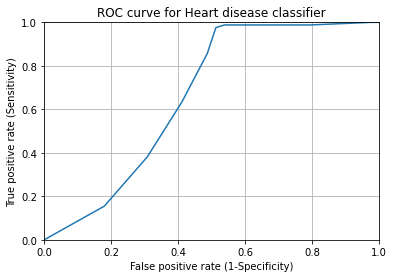

In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [134]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

In [135]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.6634615384615384

In [136]:
#preparing test dataset for prediction

In [137]:
#loan_id = test.iloc[:,0]

In [139]:
test_cl=test.drop(['Loan_ID'],axis=1)


test_cl.Gender = test_cl.Gender.map({'Male':0,'Female':1})
test_cl.Married = test_cl.Married.map({'No':0,'Yes':1})
test_cl.Dependents = test_cl.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
test_cl.Education = test_cl.Education.map({'Not Graduate':0,'Graduate':1})
test_cl.Self_Employed = test_cl.Self_Employed.map({'No':0,'Yes':1})


In [140]:
test_cl.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,Urban
1,0.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,Urban
2,0.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,Urban
3,0.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,Urban
4,0.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,Urban


In [141]:
cols=test_cl.columns
cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [142]:
values=[0,1]
test_cl['Gender'].fillna(random.choice(values),inplace=True)
test_cl['Self_Employed'].fillna(random.choice(values),inplace=True)

In [143]:
values=[0,1,2,3]
test_cl['Dependents'].fillna(random.choice(values),inplace=True)

In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_cl['Property_Area']=le.fit_transform(test_cl['Property_Area'])

In [146]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
test_cl = (imputer.fit_transform(test_cl))

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(test_cl)

In [148]:
X_test = pd.DataFrame(X_test,columns=cols)
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.485479,0.758358,-0.789952,0.544812,-0.442086,0.186461,-0.673335,-0.436561,0.270817,0.458850,1.118764
1,-0.485479,0.758358,0.157474,0.544812,-0.442086,-0.352692,-0.029848,-0.176923,0.270817,0.458850,1.118764
2,-0.485479,0.758358,1.104900,0.544812,-0.442086,0.039641,0.098849,1.153717,0.270817,0.458850,1.118764
3,-0.485479,0.758358,1.104900,0.544812,-0.442086,-0.502774,0.418877,-0.598834,0.270817,-0.446515,1.118764
4,-0.485479,-1.318638,-0.789952,-1.835497,-0.442086,-0.311909,-0.673335,-0.955835,0.270817,0.458850,1.118764


In [149]:
# using knn for prediction 

In [150]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [163]:
prediction=knn.predict(X_test)
prediction

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [167]:
submission = pd.concat([loan_id,pd.Series(prediction)],axis=1)
submission 

,Loan_ID,0
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0
...,...,...
362,LP002971,1.0
363,LP002975,1.0
364,LP002980,1.0
365,LP002986,1.0


In [168]:
submission = submission.rename(columns={0:'Loan_Status'})

In [169]:
submission['Loan_Status'] = submission['Loan_Status'].map({0:'N',1:'Y'})
submission = submission.set_index('Loan_ID')

In [74]:
#submission.to_csv('Submission_knn.csv')

In [173]:
submission.to_csv('Submission_01.csv')
submission.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
